Imprort Required Libraires

In [112]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [113]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from sklearn import preprocessing
from tensorflow.keras.layers import Dense
from keras.optimizers import SGD
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
print(tf.__version__)

2.9.1


1st Data Set

Fetch the data from UCI machine learning repositarory

In [114]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
column_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

df = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=',', skipinitialspace=True)


Attribute Information:

Input Variables

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm

Dependent Variable\
class:\
-- Iris Setosa\
-- Iris Versicolour\
-- Iris Virginica

Iris Data set contains above five attriubtes of iris flower.

All Input variables are numerical variable and output variable is Dependent variable

Task :predict the correct iris flower species based on thier attributes (sepal length,sepal width,petal length,petal width)


In [115]:
df = df.copy()
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Data Prepocessing

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


This data set doesn't contian any null values and 150 observation details of iris flower

In [117]:
print(df.isna().sum())

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [118]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [119]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

Data Visualisation

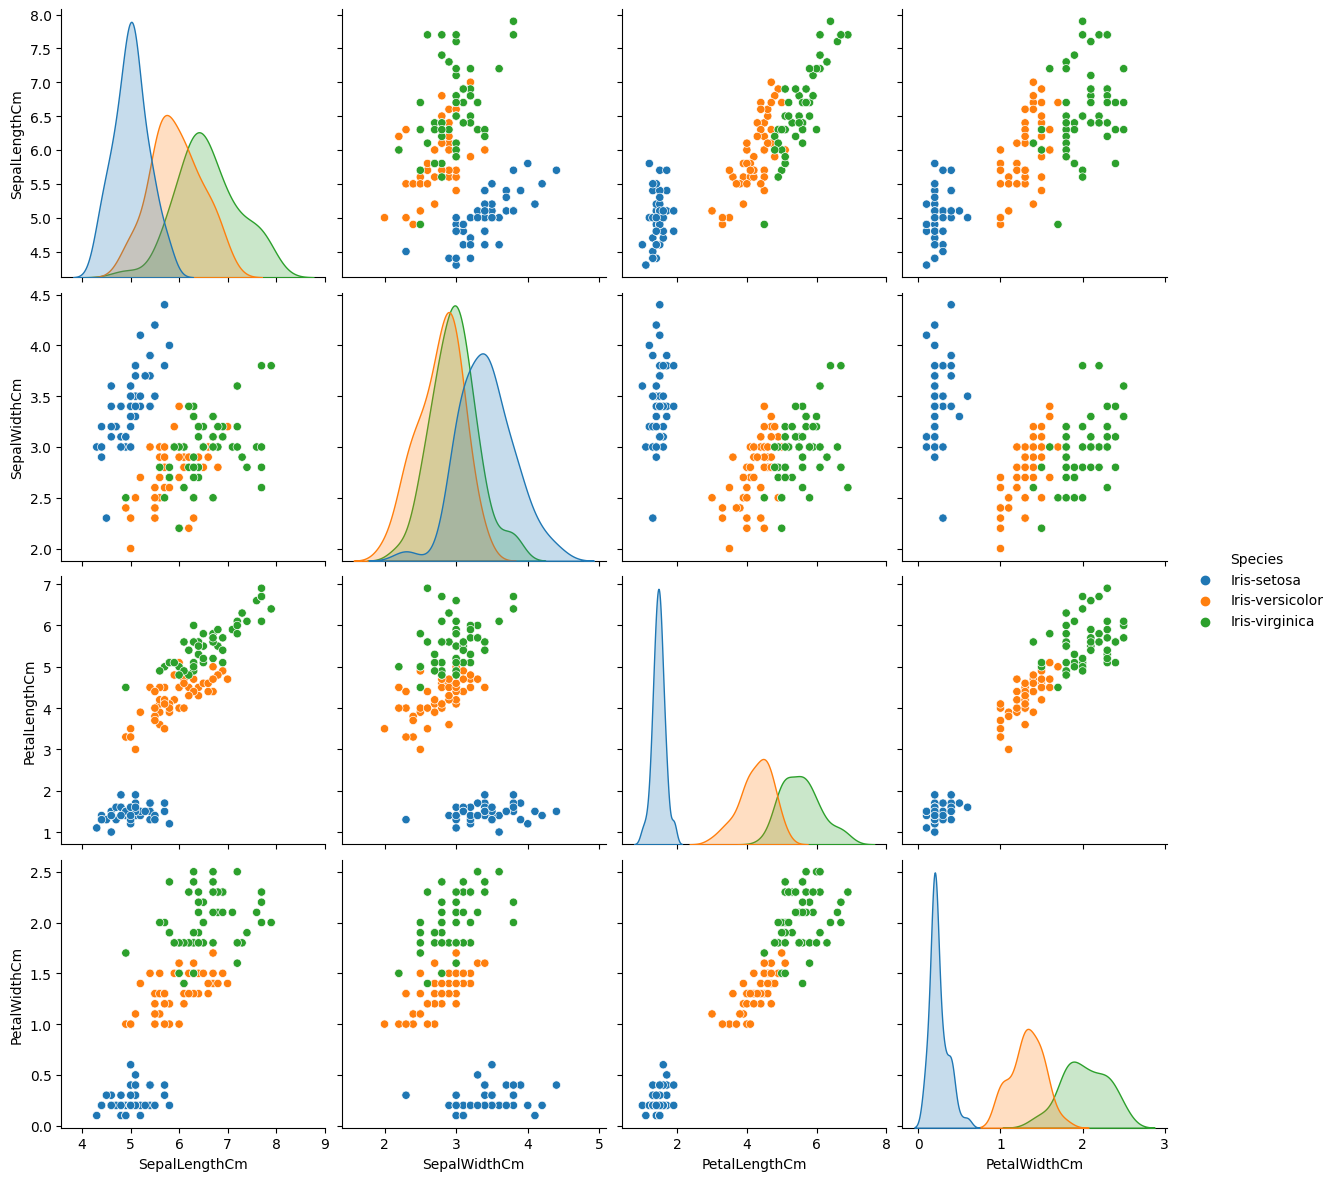

In [120]:
sns.pairplot(data=df, hue='Species', height=3, diag_kind='kde')

Next we scale the data so it become easy for a model to learn and understand the problem.\
Calculate μ & σ(fit) and apply the transformation\
Center test data with the μ & σ computed (fitted) on training data

In [121]:
data_x = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
data_y = df['Species']
df_sin_escale = data_x

In [122]:
scaler = StandardScaler()

In [123]:
data_x_escale = scaler.fit_transform(data_x.values)
df_escale = pd.DataFrame(data_x_escale, index = data_x.index, columns = data_x.columns)

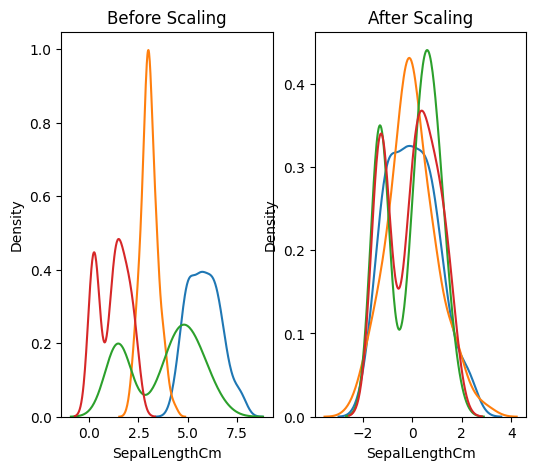

In [13]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(df_sin_escale['SepalLengthCm'], ax=ax1)
sns.kdeplot(df_sin_escale['SepalWidthCm'], ax=ax1)
sns.kdeplot(df_sin_escale['PetalLengthCm'], ax=ax1)
sns.kdeplot(df_sin_escale['PetalWidthCm'], ax=ax1)

ax2.set_title('After Scaling')
sns.kdeplot(df_escale['SepalLengthCm'], ax=ax2)
sns.kdeplot(df_escale['SepalWidthCm'], ax=ax2)
sns.kdeplot(df_escale['PetalLengthCm'], ax=ax2)
sns.kdeplot(df_escale['PetalWidthCm'], ax=ax2)

plt.show()


Next we split the data set into train and test set (80% of  dataset into  training set and  other 20% into test data)

In [124]:
X1_train, X1_test, y1_train, y1_test = train_test_split(df_escale.values, data_y, test_size = 0.2, random_state=42)

Transforming categorial data into numerical values

In [125]:
le = preprocessing.LabelEncoder()
y1_train = le.fit_transform(y1_train)
y1_test = le.fit_transform(y1_test)

In [126]:
y1_train = keras.utils.to_categorical(y1_train, num_classes = 3)
y1_test = keras.utils.to_categorical(y1_test, num_classes = 3)

In [127]:
print(X1_train.shape)
print(X1_test.shape)
print(y1_train.shape)
print(y1_test.shape)

(120, 4)
(30, 4)
(120, 3)
(30, 3)


Build Multilayer Perceptron Model

We will be now implementing a Multi-Layer Perceptron that contains 3 layers.
Keras provides easy to use functionality to achieve this using its Sequential mode and include linear stack of layers. Keras provides different types of layers. 
We will be using the Dense layer type which is a fully connected layer that implements the operation
To train our network we will be using the Stochastic Gradient Descent optimizer.
We will now create our network architecture. It will contain 3 layers. 
Our first layer will have 4 inputs corresponding to the 4 features we will be utilizing from the iris dataset.
For our second layer (hidden layer) we will be using 5 neurons.
Our third layer, will provide our classifications. This layer contains 3 neurons, corresponding to the 3 classes that we are aiming to predict.

In [128]:

model = Sequential()
model.add(Dense(100, activation='relu', input_dim=4)) #input layer
model.add(Dense(5))#hidden layer
model.add(Dense(3, activation='softmax'))#output layer
sgd = SGD(learning_rate = 0.01, decay = 1e-6, momentum = 0.9, nesterov=True)
model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Once we have our model built, we compiled our model.
To compile our model we need to provide a loss function and an optimizer.
The optimizer we defined to be the Stochastic Gradient Descent with a learning rate of 0.01, decay of 0.000001 and momentum of 0.9. 

In [129]:
history = model.fit(X1_train, y1_train, epochs = 100, batch_size = 32)

Epoch 1/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0436 - accuracy: 0.4083
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8425 - accuracy: 0.7333
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6481 - accuracy: 0.8333
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5186 - accuracy: 0.8500
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 0.4394 - accuracy: 0.8500
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 0.3908 - accuracy: 0.8667
Epoch 7/100
4/4 [==============================] - 0s 2ms/step - loss: 0.3512 - accuracy: 0.8750
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 0.3267 - accuracy: 0.8667
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 0.3060 - accuracy: 0.8833
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 0.2881 - accuracy: 0.8917
Epoch 11/100
4/4 [===========

In [130]:
# evaluate the model
test_loss1, test_accuracy1 = model.evaluate(X1_test, y1_test, verbose=0)

print(f'\n Accuracy on test set is {test_accuracy1 * 100:.2f}%')
print(f'\n Loss on test set is {test_loss1:.2f}%')


 Accuracy on test set is 100.00%

 Loss on test set is 0.03%


In [131]:
y1_pred = model.predict(X1_test)

1/1 [==============================] - 0s 52ms/step


In [132]:
y_test_class1 = np.argmax(y1_test, axis=1)
y_pred_class1 = np.argmax(y1_pred, axis=1)

print(classification_report(y_test_class1, y_pred_class1))
print(confusion_matrix(y_test_class1, y_pred_class1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [133]:
# evaluate the model train
train_loss1, train_accuracy1 = model.evaluate(X1_train, y1_train, verbose=0)

print(f'\n Accuracy on train set is {train_accuracy1 * 100:.2f}%')
print(f'\n Loss on train set is {train_loss1:.2f}%')


 Accuracy on train set is 98.33%

 Loss on train set is 0.05%


In [134]:
df_results = pd.DataFrame.from_dict(history.history)

Graph accuracy plot

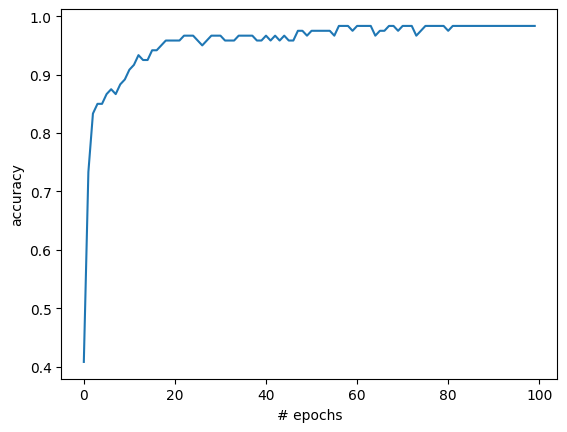

In [135]:
plt.plot(df_results['accuracy'])
plt.xlabel('# epochs')
plt.ylabel('accuracy')
plt.show()

Graph 'loss' plot

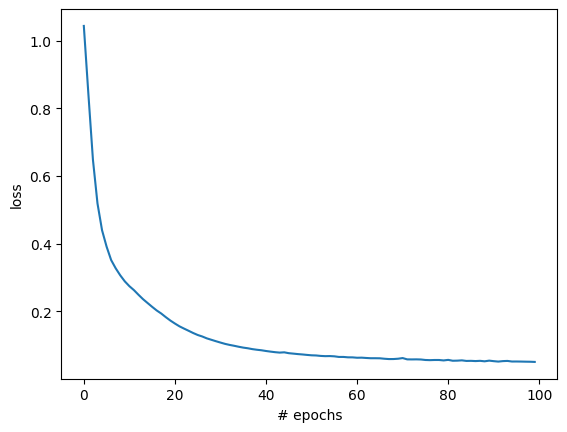

In [136]:
plt.plot(df_results['loss'])
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.show()

Conclusion: MLP model 100% accurately predict the Iris Flower Type

2nd Data Set

The datasets are related to red variants of the Portuguese "Vinho Verde" wine.\

Attribute Information:

Input variables (based on physicochemical tests):\
1 - fixed acidity\
2 - volatile acidity\
3 - citric acid\
4 - residual sugar\
5 - chlorides\
6 - free sulfur dioxide\
7 - total sulfur dioxide\
8 - density\
9 - pH\
10 - sulphates\
11 - alcohol

Output variable (based on sensory data):\
12 - quality (score between 0 and 10)

All Input variables are numerical variable and output variable is Dependent variable

Task :predict the wine quality based on thier attributes (Input Variables)

Fetch the data from UCI Machine learning repository

In [137]:
df2 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',sep=';')

In [138]:
df2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Checking the missing values

In [139]:
print(df2.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


According to output no missing values in the data set

In [140]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [141]:
df2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [142]:
df2['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

According to dataset wine quality range betwee 3-10

Text(0, 0.5, 'no of observations')

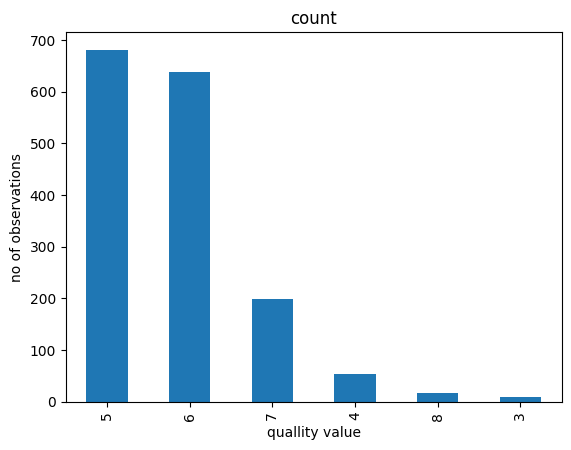

In [143]:
sample_count = df2['quality'].value_counts()
sample_count.plot(kind='bar', title='count')
plt.xlabel('quallity value')
plt.ylabel('no of observations')

Data Preprocessing

Convert quality variable into cateogrical variable ( values as 0,1,2,3,4,5,6)

In [144]:
df3 = df2.copy()

In [145]:
df3['quality'].replace({3:0, 4:1, 5:2, 6:3, 7:4, 8:5}, inplace=True)

In [146]:
df3.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,2
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,2
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,4
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,4
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,2


In [147]:
y = df3['quality']
X = df3.drop('quality', axis=1)
df_sin_escale1 = X

Next we scale the data so it become easy for a model to learn and understand the problem.
Calculate μ & σ(fit) and apply the transformation
Center test data with the μ & σ computed (fitted) on training data

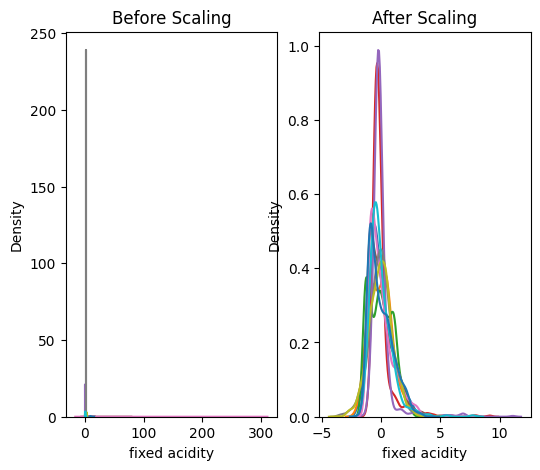

In [148]:
scaler = StandardScaler()

data_x_escale1 = scaler.fit_transform(X.values)
df_escale1 = pd.DataFrame(data_x_escale1, index = X.index, columns = X.columns)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(df_sin_escale1['fixed acidity'], ax=ax1)
sns.kdeplot(df_sin_escale1['volatile acidity'], ax=ax1)
sns.kdeplot(df_sin_escale1['citric acid'], ax=ax1)
sns.kdeplot(df_sin_escale1['residual sugar'], ax=ax1)
sns.kdeplot(df_sin_escale1['chlorides'], ax=ax1)
sns.kdeplot(df_sin_escale1['free sulfur dioxide'], ax=ax1)
sns.kdeplot(df_sin_escale1['total sulfur dioxide'], ax=ax1)
sns.kdeplot(df_sin_escale1['density'], ax=ax1)
sns.kdeplot(df_sin_escale1['pH'], ax=ax1)
sns.kdeplot(df_sin_escale1['sulphates'], ax=ax1)
sns.kdeplot(df_sin_escale1['alcohol'], ax=ax1)


ax2.set_title('After Scaling')
sns.kdeplot(df_escale1['fixed acidity'], ax=ax2)
sns.kdeplot(df_escale1['volatile acidity'], ax=ax2)
sns.kdeplot(df_escale1['citric acid'], ax=ax2)
sns.kdeplot(df_escale1['residual sugar'], ax=ax2)
sns.kdeplot(df_escale1['chlorides'], ax=ax2)
sns.kdeplot(df_escale1['free sulfur dioxide'], ax=ax2)
sns.kdeplot(df_escale1['total sulfur dioxide'], ax=ax2)
sns.kdeplot(df_escale1['density'], ax=ax2)
sns.kdeplot(df_escale1['pH'], ax=ax2)
sns.kdeplot(df_escale1['sulphates'], ax=ax2)
sns.kdeplot(df_escale1['alcohol'], ax=ax2)

plt.show()


Next we split the data set into train and test set (80% of dataset into training set and other 20% into test data)

In [149]:
X_train, X_test, y_train, y_test = train_test_split(df_escale1.values, y, test_size = 0.2, random_state=50)

le1 = preprocessing.LabelEncoder()
y_train = le1.fit_transform(y_train)
y_test = le1.fit_transform(y_test)

y_train = keras.utils.to_categorical(y_train, num_classes = 6)
y_test = keras.utils.to_categorical(y_test, num_classes = 6)

In [150]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1279, 11)
(320, 11)
(1279, 6)
(320, 6)


We will be now implementing a Multi-Layer Perceptron that contains 3 layers. Keras provides easy to use functionality to achieve this using its Sequential mode and include linear stack of layers.We will be using the Dense layer type which is a fully connected layer that implements the operation To train our network we will be using the Stochastic Gradient Descent optimizer. We will now create our network architecture. It will contain 3 layers. Our first layer will have 11 inputs corresponding to the 11 features we will be utilizing from the wine dataset. For our second layer (hidden layer) we will be using 20 neurons. Our third layer, will provide our classifications. This layer contains 6 neurons, corresponding to the 6 classes that we are aiming to predict.

In [151]:

model = Sequential()
model.add(Dense(512, activation='relu', input_dim=11)) #input layer
model.add(Dense(20))#hidden layer
model.add(Dense(6, activation='softmax'))#output layer
sgd = SGD(learning_rate = 0.01, decay = 1e-6, momentum = 0.9, nesterov=True)
model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [152]:
history = model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
40/40 [==============================] - 0s 2ms/step - loss: 1.2527 - accuracy: 0.5176
Epoch 2/100
40/40 [==============================] - 0s 2ms/step - loss: 0.9953 - accuracy: 0.5989
Epoch 3/100
40/40 [==============================] - 0s 2ms/step - loss: 0.9540 - accuracy: 0.6044
Epoch 4/100
40/40 [==============================] - 0s 2ms/step - loss: 0.9311 - accuracy: 0.6216
Epoch 5/100
40/40 [==============================] - 0s 2ms/step - loss: 0.9181 - accuracy: 0.6200
Epoch 6/100
40/40 [==============================] - 0s 2ms/step - loss: 0.9063 - accuracy: 0.6224
Epoch 7/100
40/40 [==============================] - 0s 2ms/step - loss: 0.8891 - accuracy: 0.6200
Epoch 8/100
40/40 [==============================] - 0s 3ms/step - loss: 0.8849 - accuracy: 0.6278
Epoch 9/100
40/40 [==============================] - 0s 3ms/step - loss: 0.8704 - accuracy: 0.6349
Epoch 10/100
40/40 [==============================] - 0s 3ms/step - loss: 0.8632 - accuracy: 0.6364
Epoch 11/

In [153]:
# evaluate the model (test)
test_loss2, test_accuracy2 = model.evaluate(X_test, y_test, verbose=0)

print(f'\n Accuracy on test set is {test_accuracy2 * 100:.2f}%')
print(f'\n Loss on test set is {test_loss2:.2f}%')


 Accuracy on test set is 65.00%

 Loss on test set is 1.42%


In [154]:
# evaluate the model train
train_loss2, train_accuracy2 = model.evaluate(X_train, y_train, verbose=0)

print(f'\n Accuracy on train set is {train_accuracy2 * 100:.2f}%')
print(f'\n Loss on train set is {train_loss2:.2f}%')


 Accuracy on train set is 86.79%

 Loss on train set is 0.35%


In [155]:
y_pred = model.predict(X_test)

10/10 [==============================] - 0s 1ms/step


In [156]:
y_test_class= np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         8
           2       0.77      0.71      0.74       167
           3       0.56      0.64      0.60       109
           4       0.66      0.63      0.64        30
           5       0.00      0.00      0.00         3

    accuracy                           0.65       320
   macro avg       0.33      0.33      0.33       320
weighted avg       0.65      0.65      0.65       320

[[  0   1   2   0   0   0]
 [  1   0   3   4   0   0]
 [  0   5 119  40   3   0]
 [  0   4  30  70   5   0]
 [  0   0   1  10  19   0]
 [  0   0   0   1   2   0]]


C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [157]:
df_results1 = pd.DataFrame.from_dict(history.history)

Graph accuracy plot

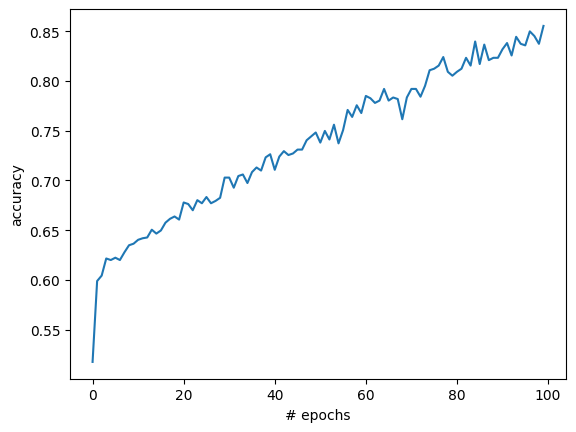

In [158]:
plt.plot(df_results1['accuracy'])
plt.xlabel('# epochs')
plt.ylabel('accuracy')
plt.show()

Graph 'loss' plot

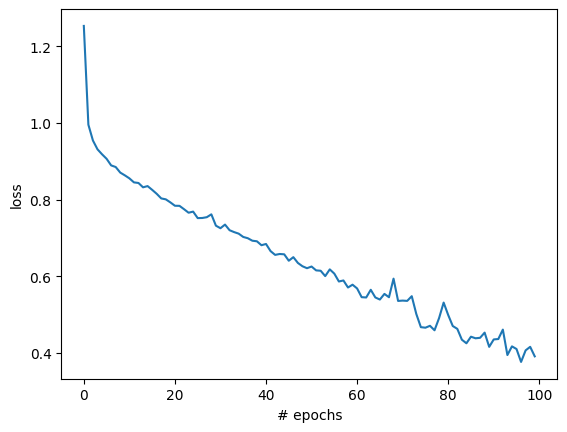

In [159]:
plt.plot(df_results1['loss'])
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.show()

Conclusion :In wine data, for training set accurately predict the wine quality for 86% but for test set wine quality prediction accuracy is 65%.

Comparing two data set Iris data set using MLP model can get higher accuracy & lower accuracy prediction for wine data set.